 <h1 style="color:blue;"> Scenario 7 notebook</h1>



- C1S7.Py01	How to create new variables
- C1S7.Py02	Feature engineering errors and how to correct
- C1S7.Py03	Coding debt to income ratio with error catches 
- C1S7.Py04	Multiple regression with residuals 

In [4]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [6]:
#Code Block 2
df = pd.read_csv('data/Scenario7.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

In [8]:
#Code Block 3
df.head(3)

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,NaN,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,NaN,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,Verified,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019


 <h2 style="color:blue;">C1.S7.Py01 - How to create new variables</h2>
 
<h3 style="color:blue;">  Creating a ratio of loan amount to income  </h3>  

In [11]:
#Code Block 4
df.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,NaN,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,NaN,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,Verified,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,Verified,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,NaN,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019


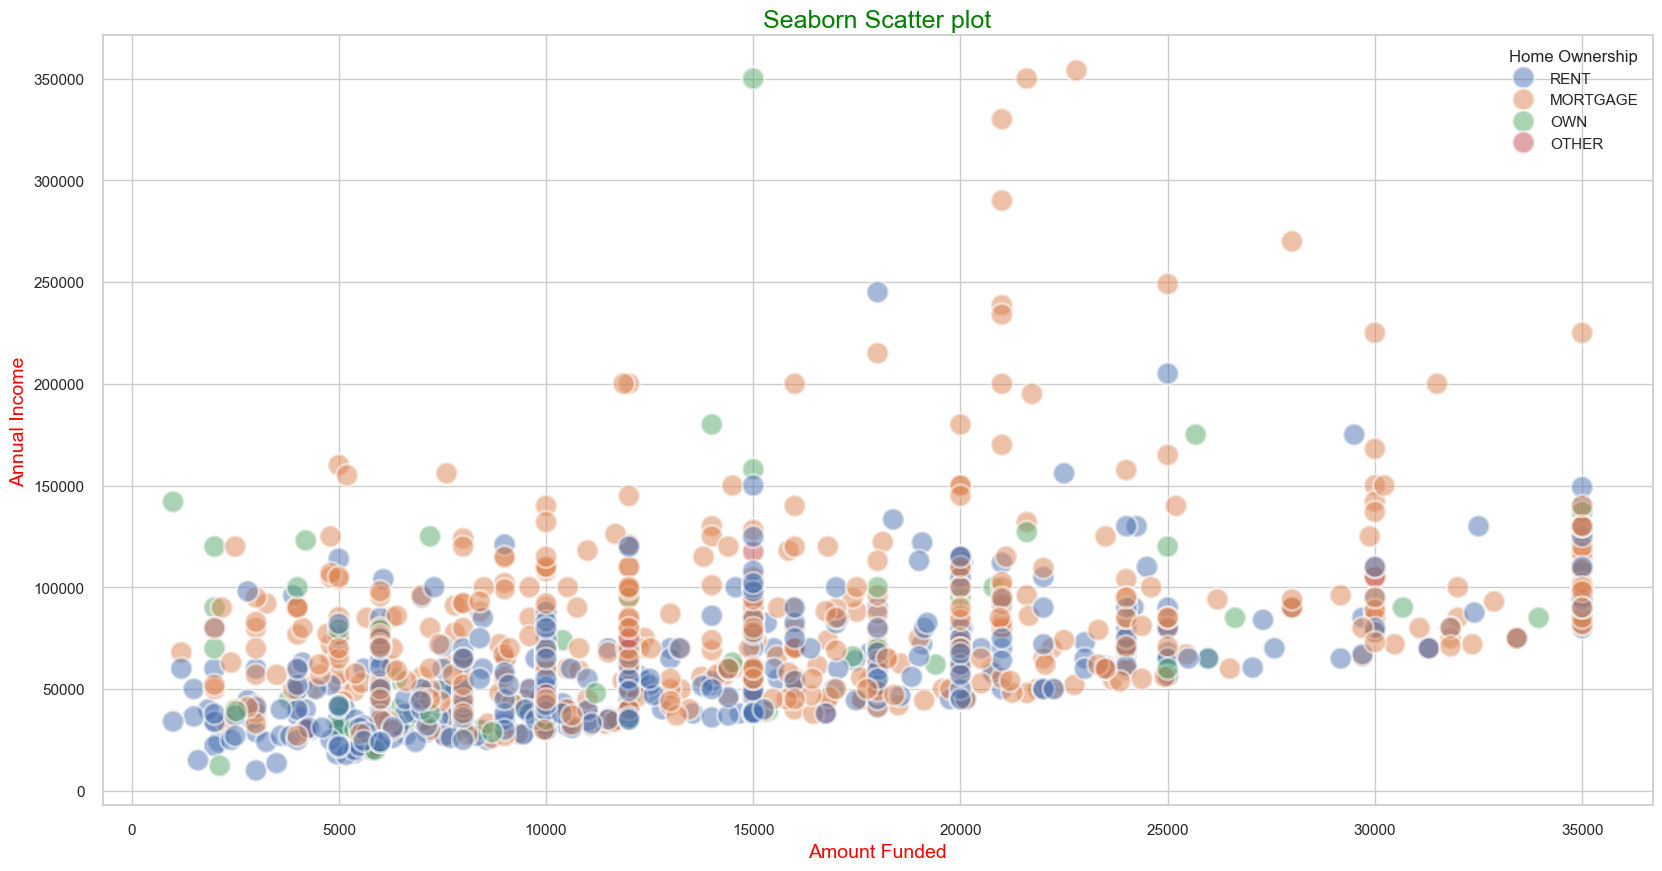

In [13]:
#Code Block 5

#Create a random sample of 1000 
df_sample = df.sample(1000)

df_sample = df_sample[df_sample['Annual Income']<400000]

# Create a custom scatterplot
sns.set(style='whitegrid')
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.scatterplot(y='Annual Income', x='Amount Funded', data=df_sample, alpha=.5, s = 250, edgecolor='white', linewidth=2, hue='Home Ownership')
plt.title('Seaborn Scatter plot', color = 'green', fontsize='18')
plt.xlabel('Amount Funded', color = 'red', fontsize='14')
plt.ylabel('Annual Income', color = 'red', fontsize='14')
plt.show()

<h3 style="color:red;">Why use an underscore in the column name?</h3>

In [15]:
#Code Block 6
df['Loan_Income'] = df['Amount Funded'] / df['Annual Income']
df.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,NaN,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,NaN,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,Verified,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,Verified,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,NaN,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385


<h3 style="color:blue;">  How to overwrite an existing column </h3>  

In [19]:
#Code Block 7

df['Loan_Income'] = 1
df[['Amount Funded', 'Annual Income', 'Loan_Income']].head()

,Amount Funded,Annual Income,Loan_Income
6,7500,92000,1
8,10000,108000,1
4,15000,72000,1
7,35000,114000,1
9,3600,65000,1


In [21]:
#Code Block 8

df['Loan_Income'] = df['Amount Funded'] / df['Annual Income']
df[['Amount Funded', 'Annual Income', 'Loan_Income']].head()

,Amount Funded,Annual Income,Loan_Income
6,7500,92000,0.081522
8,10000,108000,0.092593
4,15000,72000,0.208333
7,35000,114000,0.307018
9,3600,65000,0.055385


<h3 style="color:blue;">  How to drop a column </h3> 

In [23]:
#Code Block 9

df = df.drop('Loan_Income', axis = 1)
df.head(2)

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,NaN,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,NaN,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018


In [27]:
#Code Block 10

df['Loan_Income'] = df['Amount Funded'] / df['Annual Income']

<h2 style="color:blue;">C1.S7.Py02 - Feature engineering errors and how to correct</h2>

In [30]:
#Code Block 11

df.head(10)

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,NaN,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,NaN,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,Verified,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,Verified,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,NaN,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385
10,782052,909834,12/22/19,16.29,24000,404255.0,92000,10760.0,19500.0,60,C,Ann Arbor Public Schools,10.0,MORTGAGE,Verified,home_improvement,481xx,MI,1.0,2,19,61,60 months,6,12,2019,0.260870
11,791320,732425,11/25/18,15.31,20000,414879.0,66000,8777.0,15300.0,36,C,Gainesville Police Department,10.0,MORTGAGE,Verified,debt_consolidation,326xx,FL,1.0,2,12,37,36 months,6,11,2018,0.303030
12,793335,703357,10/4/18,7.90,21000,175992.0,80000,17564.0,53721.0,36,A,Cerner,7.0,MORTGAGE,NaN,wedding,641xx,MO,NaN,0,12,37,36 months,3,10,2018,0.262500
13,820063,852149,9/4/19,6.03,20000,214813.0,144000,34551.0,91000.0,36,A,Federal Rserve Bank of Dallas,6.0,MORTGAGE,Verified,house,750xx,TX,NaN,0,10,37,36 months,2,9,2019,0.138889
16,884479,768235,1/13/19,11.14,16950,39414.0,43000,7522.0,36700.0,60,B,Consolidated Electrical Distributors,2.0,MORTGAGE,Verified,car,708xx,LA,NaN,0,15,61,60 months,6,1,2019,0.394186


In [36]:
#Code Block 12

#This will cause an error
(x,y) = (5,0)
z = x/y
z

ZeroDivisionError: division by zero

In [47]:
#Code Block 13

(x,y) = (5,10)
(a,b) = (5,0)
try:
    z = x / y
    c = a / b
except ZeroDivisionError:
    print ("divide by zero")
#if there is a 0 it will print divide by zero, but there is an exception we created if this happens that could be used to help prevent us 
#from getting errors for having 0s

divide by zero


<h3 style="color:red;">  Divide by zero denominator in pandas </h3>  

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30063 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Accounts             29983 non-null  float64
 8   Total Revolving Credit Line    30059 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

In [58]:
#Code Block 14
df['Debt_Account'] = df['Total Debt'] / df['Open Accounts']

In [60]:
#Code Block 15
df['Debt_Delinquent'] = df['Total Debt'] / df['Delinquencies Past 24 Months']

In [62]:
#Code Block 16
df[['Debt_Account', 'Debt_Delinquent']].describe()

,Debt_Account,Debt_Delinquent
count,30063.000000,4.877000e+03
mean,12961.700005,1.389312e+05
std,15874.585077,1.876545e+05
min,2.500000,3.110000e+02
25%,2772.950000,2.802500e+04
50%,7017.000000,8.623500e+04
75%,18446.944444,2.008530e+05
max,615390.615385,8.000078e+06


<h3 style="color:blue;">How to change from scientific notation to standard format</h3>  

In [67]:
#Code Block 17
round(df[['Debt_Account', 'Debt_Delinquent']].describe(),2)

,Debt_Account,Debt_Delinquent
count,30063.00,4877.00
mean,12961.70,138931.23
std,15874.59,187654.49
min,2.50,311.00
25%,2772.95,28025.00
50%,7017.00,86235.00
75%,18446.94,200853.00
max,615390.62,8000078.00


<h3 style="color:blue;"> Using a function for flexibility  </h3>  

In [69]:
#Code Block 18
def delinquent(c):
  if pd.isna(c['Delinquencies Past 24 Months']):
    return 1
  else: 
    return 2

df['change'] = df.apply(delinquent, axis=1)

In [71]:
#Code Block 19

# to see the counts for 1 and 2 for 'change'
df['change'].value_counts()

change
1    25194
2     4877
Name: count, dtype: int64

In [73]:
#Code Block 20 

# drop the column since it is not needed
df = df.drop(['Debt_Account', 'Debt_Delinquent','change'], axis = 1)


<h2 style="color:blue;">C1.S7.Py03 - Coding debt to income ratio with error catches</h2>

In [76]:
#Code Block 21

df['Debt_Income'] = df['Total Debt'] / df['Annual Income']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30063 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Accounts             29983 non-null  float64
 8   Total Revolving Credit Line    30059 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

<h3 style="color:blue;">Are there any ['Total Debt'] values == 0?</h3>  

In [79]:
#Code Block 22
display(df[df['Total Debt']==0])
print('----------------------------------')
print('Total Debt - Null Values (NaNs)')
display(df[df['Total Debt'].isnull()])

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income


----------------------------------
Total Debt - Null Values (NaNs)


,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income
13229,1974556,777636,1/23/19,11.14,15000,NaN,40000,NaN,5300.0,36,B,National Vision,10.0,OWN,Source Verified,home_improvement,563xx,MN,NaN,0,3,37,36 months,2,1,2019,0.375000,NaN
2523,1762307,651774,4/23/18,10.16,2700,NaN,25000,NaN,8600.0,36,B,peo management group,2.0,RENT,Source Verified,small_business,330xx,FL,NaN,2,6,37,36 months,0,4,2018,0.108000,NaN
3320,1775959,818360,5/16/19,15.31,6850,NaN,80000,NaN,2500.0,36,C,Ocean Peace Inc.,1.0,RENT,Verified,debt_consolidation,982xx,WA,NaN,3,3,37,36 months,3,5,2019,0.085625,NaN
12942,1970563,825367,6/11/19,7.90,4600,NaN,55000,NaN,4500.0,36,A,NaN,NaN,RENT,NaN,debt_consolidation,130xx,NY,NaN,0,5,37,36 months,1,6,2019,0.083636,NaN
15188,2357650,902154,12/10/19,11.14,4125,NaN,85000,NaN,19300.0,36,B,AppMedicine,1.0,RENT,NaN,car,940xx,CA,NaN,0,4,37,36 months,1,12,2019,0.048529,NaN
17394,2637371,640344,4/1/18,13.11,2725,NaN,54000,NaN,900.0,36,B,Google through Adecco,1.0,RENT,NaN,major_purchase,941xx,CA,NaN,1,2,37,36 months,6,4,2018,0.050463,NaN
17621,2641260,905491,12/15/19,7.62,4800,NaN,65000,NaN,20800.0,36,A,Fedex Express,10.0,RENT,NaN,vacation,941xx,CA,NaN,0,6,37,36 months,6,12,2019,0.073846,NaN
27458,3873934,639084,3/25/18,16.29,3000,NaN,50000,NaN,2000.0,36,C,Norman Police Department,4.0,RENT,NaN,car,730xx,OK,NaN,0,0,37,36 months,6,3,2018,0.060000,NaN


<h3 style="color:green;">Different options for Total Debt create Debt_Income</h3>  

- **OPTION 1**: Leave Total Debt as **null** and fill in Debt_Income with a 0.
- **OPTION 2**: Fill in NaN values for Total Debt with 0, if Total Debt that is **null** means the Member does not have debt  

<h3 style="color:green;">OPTION 1: Leave Total Debt as null and fill in Debt_Income with a 0</h3>  

In [84]:
#Code Block 23

df_opt1 = df[['Interest Rate', 'Amount Funded', 'Total Debt' ,'Annual Income', 'Loan_Income']].copy()
#Add .copy() so that is a separate slice of df

In [86]:
#Code Block 24

#function for evaluating a property with an if/then
def debtincome(c):
  if pd.isna(c['Total Debt']):
    return 0
  else: 
    return c['Total Debt'] / c['Annual Income']

df_opt1['Debt_Income'] = df.apply(debtincome, axis=1)
df_opt1.head()

,Interest Rate,Amount Funded,Total Debt,Annual Income,Loan_Income,Debt_Income
6,7.62,7500,265809.0,92000,0.081522,2.889228
8,6.03,10000,152402.0,108000,0.092593,1.411130
4,16.29,15000,227890.0,72000,0.208333,3.165139
7,21.49,35000,354982.0,114000,0.307018,3.113877
9,11.14,3600,175788.0,65000,0.055385,2.704431


In [90]:
df_opt1[df_opt1['Total Debt'].isnull()]

,Interest Rate,Amount Funded,Total Debt,Annual Income,Loan_Income,Debt_Income
13229,11.14,15000,NaN,40000,0.375000,0.0
2523,10.16,2700,NaN,25000,0.108000,0.0
3320,15.31,6850,NaN,80000,0.085625,0.0
12942,7.90,4600,NaN,55000,0.083636,0.0
15188,11.14,4125,NaN,85000,0.048529,0.0
17394,13.11,2725,NaN,54000,0.050463,0.0
17621,7.62,4800,NaN,65000,0.073846,0.0
27458,16.29,3000,NaN,50000,0.060000,0.0


<h3 style="color:green;">OPTION 2: Fill in NaN values for Total Debt with 0, if Total Debt that is null means the Member does not have debt  </h3>  

In [92]:
#Code Block 25
df_opt2 = df[['Interest Rate', 'Amount Funded', 'Total Debt' ,'Annual Income', 'Loan_Income']].copy()

In [94]:
#Code Block 26
df_opt2['Total Debt'] = df_opt2['Total Debt'].fillna(0)

In [96]:
#Code Block 27
df_opt2[df_opt2['Total Debt']==0]

,Interest Rate,Amount Funded,Total Debt,Annual Income,Loan_Income
13229,11.14,15000,0.0,40000,0.375000
2523,10.16,2700,0.0,25000,0.108000
3320,15.31,6850,0.0,80000,0.085625
12942,7.90,4600,0.0,55000,0.083636
15188,11.14,4125,0.0,85000,0.048529
17394,13.11,2725,0.0,54000,0.050463
17621,7.62,4800,0.0,65000,0.073846
27458,16.29,3000,0.0,50000,0.060000


In [98]:
#Code Block 28
df_opt2['Debt_Income'] = df_opt2['Total Debt'] / df_opt2['Annual Income']
df_opt2[df_opt2['Total Debt']<20] #to show Members with and without Total Debt == 0

,Interest Rate,Amount Funded,Total Debt,Annual Income,Loan_Income,Debt_Income
7874,7.90,12000,11.0,46000,0.260870,0.000239
13229,11.14,15000,0.0,40000,0.375000,0.000000
21927,23.28,30675,5.0,90000,0.340833,0.000056
2052,8.90,16425,17.0,63000,0.260714,0.000270
2523,10.16,2700,0.0,25000,0.108000,0.000000
3320,15.31,6850,0.0,80000,0.085625,0.000000
5304,12.12,1850,15.0,40000,0.046250,0.000375
12942,7.90,4600,0.0,55000,0.083636,0.000000
15188,11.14,4125,0.0,85000,0.048529,0.000000
17394,13.11,2725,0.0,54000,0.050463,0.000000


In [100]:
## Code Block 29
df_opt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest Rate  30071 non-null  float64
 1   Amount Funded  30071 non-null  int64  
 2   Total Debt     30071 non-null  float64
 3   Annual Income  30071 non-null  int64  
 4   Loan_Income    30071 non-null  float64
 5   Debt_Income    30071 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.6 MB


<h2 style="color:blue;">C1.S7.Py04 - Multiple regression with residuals</h2>

<h3 style="color:blue;">Use OPTION 1 (df_opt1) for the multiple regression </h3>  

In [105]:
#Code Block 30
display(df_opt1.head())
df_opt1.info()

,Interest Rate,Amount Funded,Total Debt,Annual Income,Loan_Income,Debt_Income
6,7.62,7500,265809.0,92000,0.081522,2.889228
8,6.03,10000,152402.0,108000,0.092593,1.411130
4,16.29,15000,227890.0,72000,0.208333,3.165139
7,21.49,35000,354982.0,114000,0.307018,3.113877
9,11.14,3600,175788.0,65000,0.055385,2.704431


<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest Rate  30071 non-null  float64
 1   Amount Funded  30071 non-null  int64  
 2   Total Debt     30063 non-null  float64
 3   Annual Income  30071 non-null  int64  
 4   Loan_Income    30071 non-null  float64
 5   Debt_Income    30071 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.6 MB


<h3 style="color:red;">CAUTION: The Code Block below will cause an error</h3>  

In [108]:
#Code Block 31
import statsmodels
import statsmodels.api as sm


X = df_opt1[['Amount Funded', 'Annual Income', 'Total Debt', 'Loan_Income', 'Debt_Income']]
y = df_opt1['Interest Rate']
X = sm.add_constant(X) # adding a constant

reg_opt1 = sm.OLS(y, X).fit()

predictions_opt1 = reg_opt1.predict(X) 
resid_opt1 = reg_opt1.resid
reg_opt1.summary()


MissingDataError: exog contains inf or nans

<h3 style="color:red;">What caused the error?  </h3>  

- Total Debt still has NaN values because we left the NaN values alone and placed a 0 in Debt_Income

In [110]:
#Code Block 32
df_opt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest Rate  30071 non-null  float64
 1   Amount Funded  30071 non-null  int64  
 2   Total Debt     30063 non-null  float64
 3   Annual Income  30071 non-null  int64  
 4   Loan_Income    30071 non-null  float64
 5   Debt_Income    30071 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.6 MB


<h3 style="color:blue;">For this regression to work we need to fill in NaNs or drop NaNs rows.  </h3>  

In [112]:
#Code Block 33
df_opt1 = df_opt1.dropna()
df_opt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30063 entries, 6 to 30067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest Rate  30063 non-null  float64
 1   Amount Funded  30063 non-null  int64  
 2   Total Debt     30063 non-null  float64
 3   Annual Income  30063 non-null  int64  
 4   Loan_Income    30063 non-null  float64
 5   Debt_Income    30063 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.6 MB


In [114]:
#Code Block 34
import statsmodels
import statsmodels.api as sm

In [116]:
#Code Block 35
X = df_opt1[['Amount Funded', 'Annual Income', 'Total Debt', 'Loan_Income', 'Debt_Income']]
y = df_opt1['Interest Rate']
X = sm.add_constant(X) # adding a constant

reg_opt1 = sm.OLS(y, X).fit()

predictions_opt1 = reg_opt1.predict(X) 
resid_opt1 = reg_opt1.resid
reg_opt1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     681.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:29:26   Log-Likelihood:                -84040.
No. Observations:               30063   AIC:                         1.681e+05
Df Residuals:                   30057   BIC:                         1.681e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6794      0.066    177.530      0.000      11.550      11.808
Amount Funded  9.228e-05   4.44e-06     20.762      0.000    8.36e-05       0.000
Annual Income  -1.99e-07   3.59e-07     -0.554      0.580   -9.03e-07    5.05e-07
Total Debt    -1.882e-06   2.82e-07     -6.664      0.000   -2.44e-06   -1.33e-06
Loan_Income       6.3586      0.325     19.572      0.000       5.722       6.995
Debt_Income      -0.1756      0.025     -7.072      0.000      -0.224      -0.127
==============================================================================
Omnibus:                      599.999   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.866
Skew:                           0.109   Prob(JB):                     1.18e-78
Kurtosis:                       2.511   Cond. No.                     3.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
#Code Block 36
df_reg_results = pd.concat([df_opt1, predictions_opt1, resid_opt1], axis=1)
df_reg_results=df_reg_results.rename(columns = {0:'Int_Pred_opt1', 1:'Resid_opt1'})
df_reg_results.head(10)

,Interest Rate,Amount Funded,Total Debt,Annual Income,Loan_Income,Debt_Income,Int_Pred_opt1,Resid_opt1
6,7.62,7500,265809.0,92000,0.081522,2.889228,11.863889,-4.243889
8,6.03,10000,152402.0,108000,0.092593,1.411130,12.634791,-6.604791
4,16.29,15000,227890.0,72000,0.208333,3.165139,13.389186,2.900814
7,21.49,35000,354982.0,114000,0.307018,3.113877,15.623663,5.866337
9,11.14,3600,175788.0,65000,0.055385,2.704431,11.545056,-0.405056
10,16.29,24000,404255.0,92000,0.260870,4.394076,14.002019,2.287981
11,15.31,20000,414879.0,66000,0.303030,6.286045,13.553917,1.756083
12,7.90,21000,175992.0,80000,0.262500,2.199900,14.552851,-6.652851
13,6.03,20000,214813.0,144000,0.138889,1.491757,13.713153,-7.683153
16,11.14,16950,39414.0,43000,0.394186,0.916605,15.506230,-4.366230


<Axes: xlabel='Int_Pred_opt1', ylabel='Resid_opt1'>

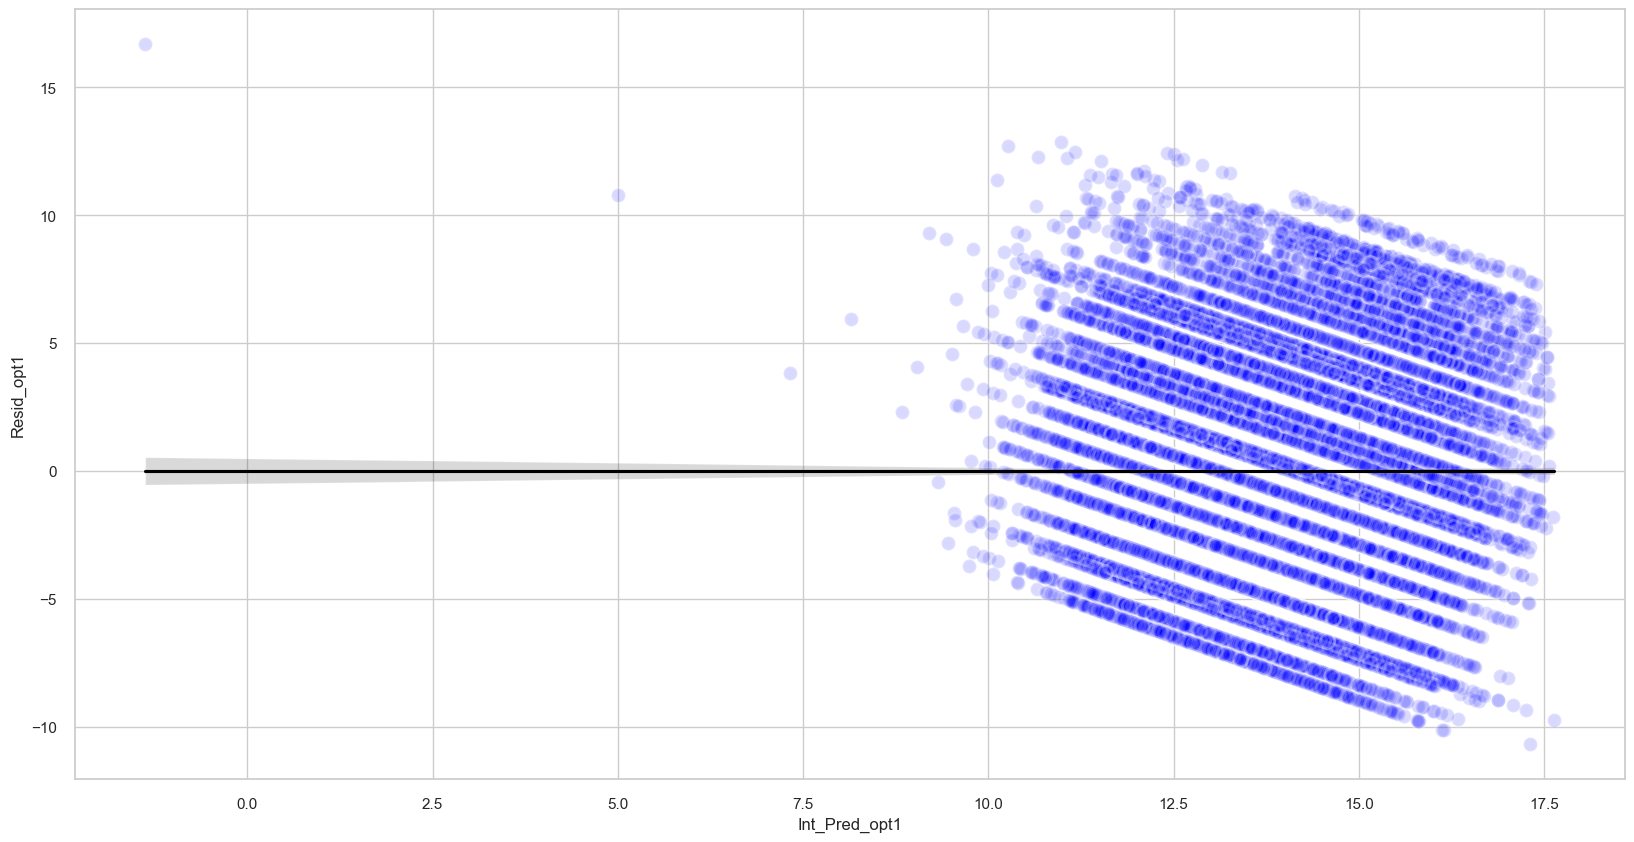

In [122]:
#Code Block 37
plt.figure(figsize=(20,10)) #changes area of regplot
sns.regplot(x='Int_Pred_opt1', y='Resid_opt1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})


(-11.0, 14.0)

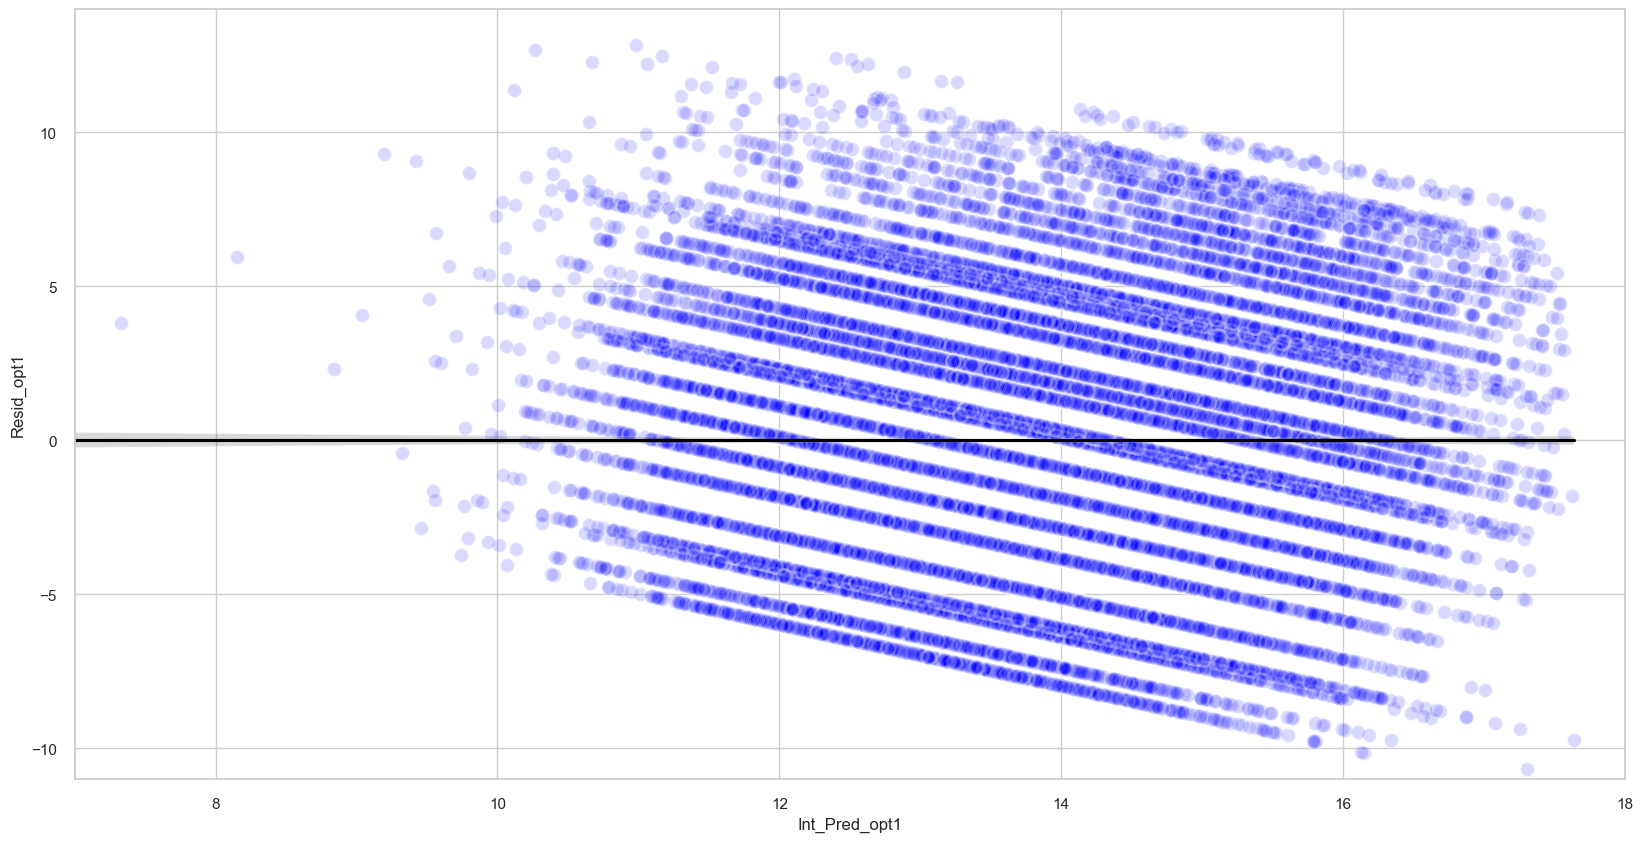

In [126]:
#Code Block 38
plt.figure(figsize=(20,10)) #changes area of regplot
sns.regplot(x='Int_Pred_opt1', y='Resid_opt1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
plt.xlim(7, 18)
plt.ylim(-11, 14)

In [128]:
#Code Block 39
df_opt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest Rate  30071 non-null  float64
 1   Amount Funded  30071 non-null  int64  
 2   Total Debt     30071 non-null  float64
 3   Annual Income  30071 non-null  int64  
 4   Loan_Income    30071 non-null  float64
 5   Debt_Income    30071 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.6 MB


In [132]:
#Code Block 40

X = df_opt2[['Amount Funded', 'Annual Income', 'Total Debt', 'Loan_Income', 'Debt_Income']]
y = df_opt2['Interest Rate']
X = sm.add_constant(X) # adding a constant

reg_opt2 = sm.OLS(y, X).fit()

predictions_opt2 = reg_opt2.predict(X) 
resid_opt2 = reg_opt2.resid
reg_opt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     681.9
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:37:14   Log-Likelihood:                -84061.
No. Observations:               30071   AIC:                         1.681e+05
Df Residuals:                   30065   BIC:                         1.682e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6784      0.066    177.599      0.000      11.550      11.807
Amount Funded  9.232e-05   4.44e-06     20.774      0.000    8.36e-05       0.000
Annual Income  -1.98e-07   3.59e-07     -0.551      0.581   -9.02e-07    5.06e-07
Total Debt    -1.884e-06   2.82e-07     -6.671      0.000   -2.44e-06   -1.33e-06
Loan_Income       6.3563      0.325     19.568      0.000       5.720       6.993
Debt_Income      -0.1752      0.025     -7.058      0.000      -0.224      -0.127
==============================================================================
Omnibus:                      600.514   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.153
Skew:                           0.109   Prob(JB):                     1.03e-78
Kurtosis:                       2.511   Cond. No.                     3.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
#Code Block 41

df_reg_results2 = pd.concat([df_opt2, predictions_opt2, resid_opt2], axis=1)
df_reg_results2=df_reg_results2.rename(columns = {0:'Int_Pred_opt2', 1:'Resid_opt2'})
df_reg_results2.head(10)

,Interest Rate,Amount Funded,Total Debt,Annual Income,Loan_Income,Debt_Income,Int_Pred_opt2,Resid_opt2
6,7.62,7500,265809.0,92000,0.081522,2.889228,11.863715,-4.243715
8,6.03,10000,152402.0,108000,0.092593,1.411130,12.634399,-6.604399
4,16.29,15000,227890.0,72000,0.208333,3.165139,13.389230,2.900770
7,21.49,35000,354982.0,114000,0.307018,3.113877,15.624194,5.865806
9,11.14,3600,175788.0,65000,0.055385,2.704431,11.544838,-0.404838
10,16.29,24000,404255.0,92000,0.260870,4.394076,14.002496,2.287504
11,15.31,20000,414879.0,66000,0.303030,6.286045,13.554764,1.755236
12,7.90,21000,175992.0,80000,0.262500,2.199900,14.552806,-6.652806
13,6.03,20000,214813.0,144000,0.138889,1.491757,13.713068,-7.683068
16,11.14,16950,39414.0,43000,0.394186,0.916605,15.505452,-4.365452


(-11.0, 14.0)

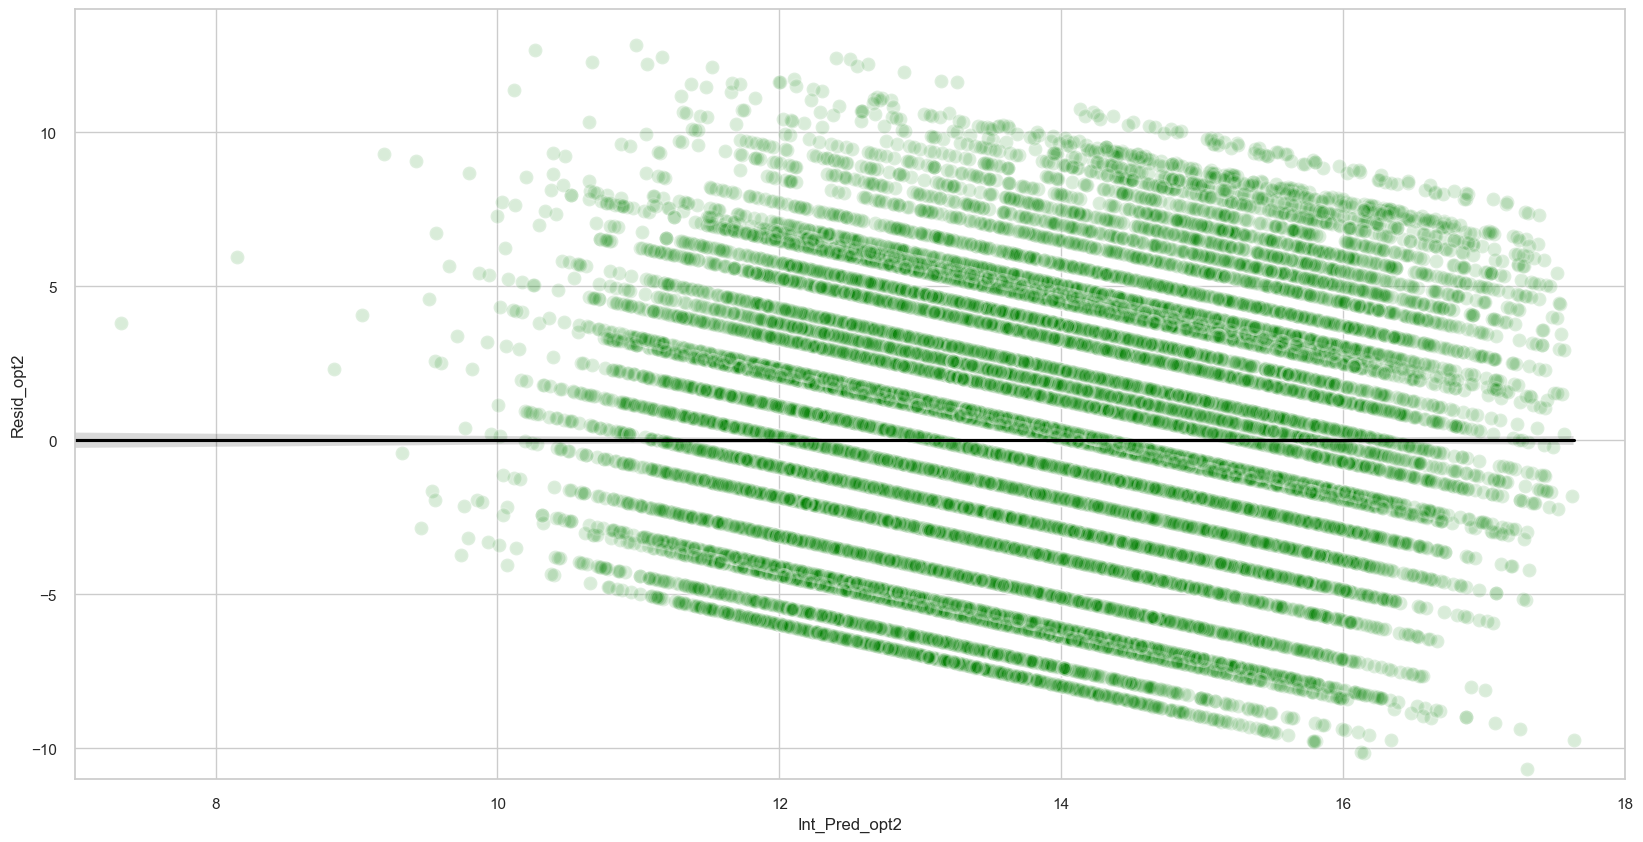

In [138]:
#Code Block 42

plt.figure(figsize=(20,10)) #changes area of regplot
sns.regplot(x='Int_Pred_opt2', y='Resid_opt2', 
              data = df_reg_results2, scatter_kws={"color":"green","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
plt.xlim(7, 18)
plt.ylim(-11, 14)

(-11.0, 14.0)

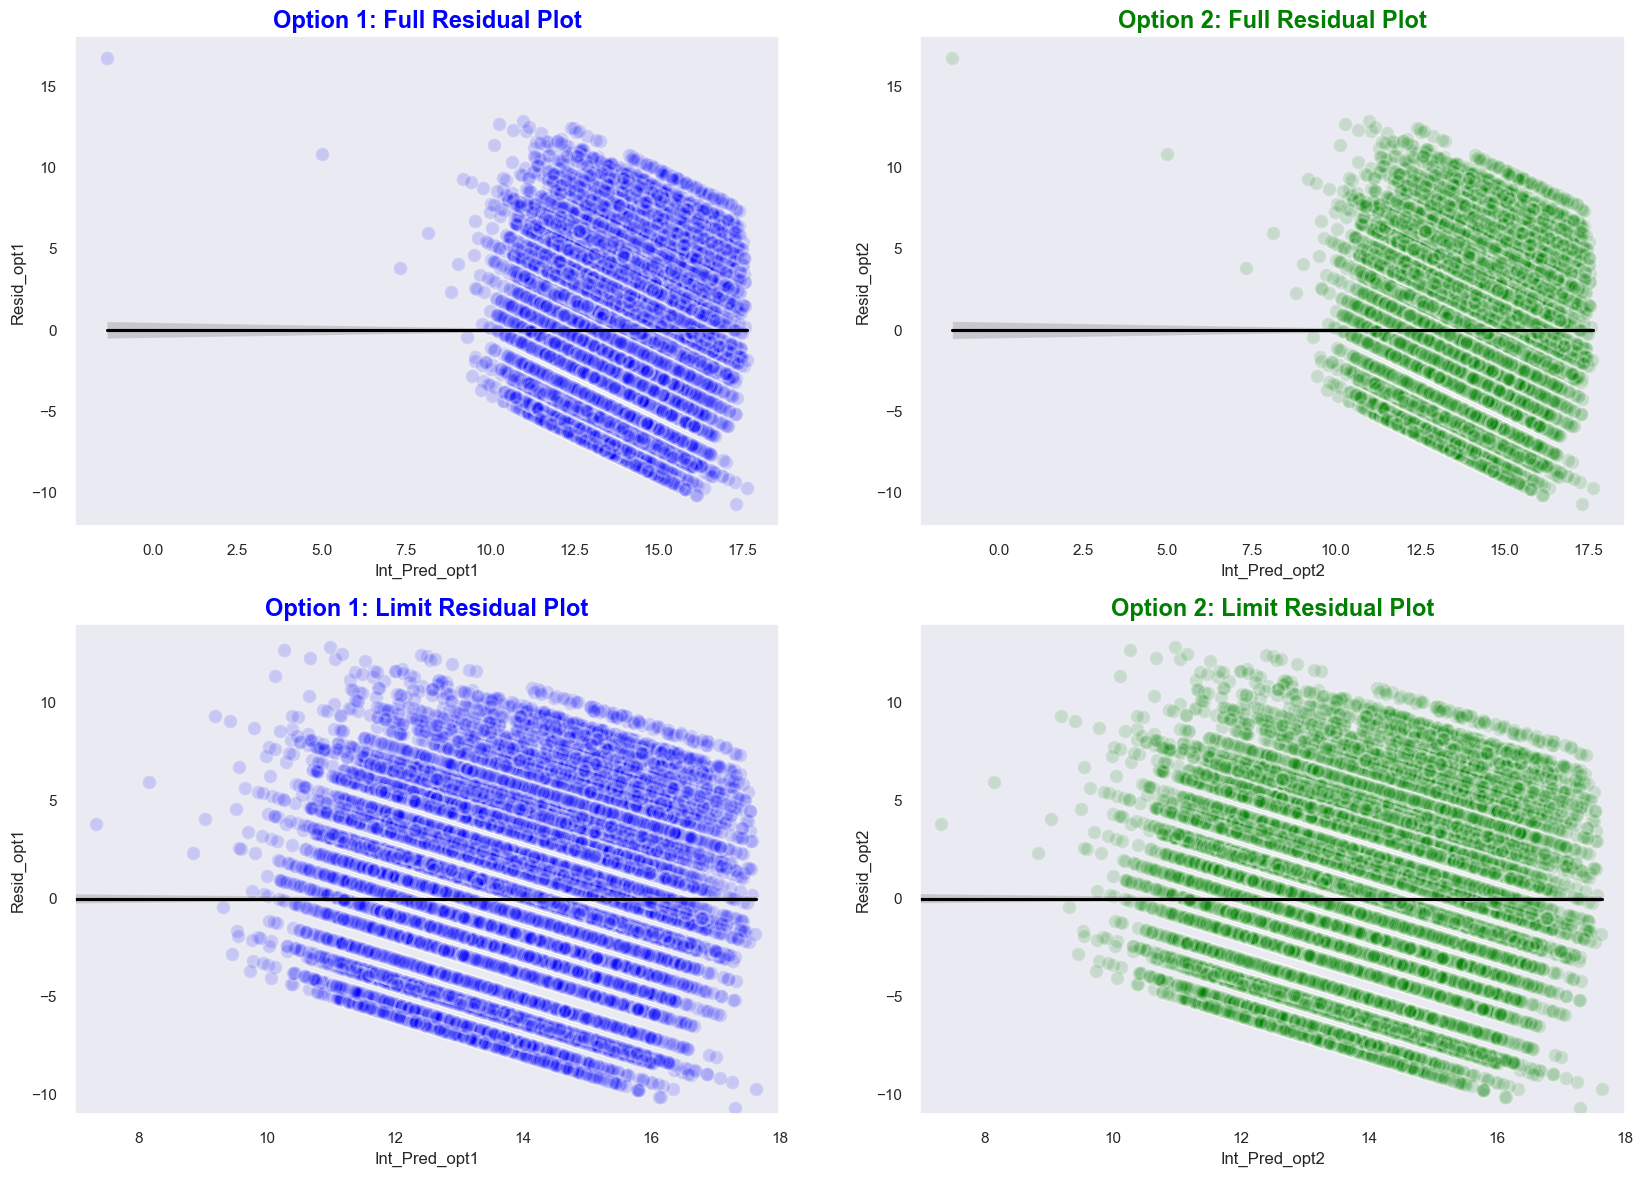

In [140]:
#Code Block 43

sns.set(style='dark')
plt.figure(figsize=(20,14))

#top left 
ax1 = plt.subplot2grid((2, 2), (0, 0))
plt.title('Option 1: Full Residual Plot', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')
ax1 = sns.regplot(x='Int_Pred_opt1', y='Resid_opt1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})


#top right 
ax2 = plt.subplot2grid((2, 2), (0, 1))
plt.title('Option 2: Full Residual Plot', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax2 = sns.regplot(x='Int_Pred_opt2', y='Resid_opt2', 
              data = df_reg_results2, scatter_kws={"color":"green","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})


#bottom left 
ax3 = plt.subplot2grid((2, 2), (1, 0))
plt.title('Option 1: Limit Residual Plot', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')
ax3 = sns.regplot(x='Int_Pred_opt1', y='Resid_opt1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
plt.xlim(7, 18)
plt.ylim(-11, 14)

#bottom right 
ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.title('Option 2: Limit Residual Plot', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax4 = sns.regplot(x='Int_Pred_opt2', y='Resid_opt2', 
              data = df_reg_results2, scatter_kws={"color":"green","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
plt.xlim(7, 18)
plt.ylim(-11, 14)